In [4]:
# general tools
import sys
from glob import glob
from os.path import basename
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np
import netCDF4 as nc

# graph tools
import matplotlib.pyplot as plt
%matplotlib inline

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/DL_downscaling/')
import data_utils as du
from namelist import * 

In [5]:
PRISM_dir

'/glade/scratch/ksha/BACKUP/PRISM/'

In [2]:
filenames = sorted(glob(PRISM_CLIM_BC_dir+'*.nc*'))

In [3]:
filenames

['/glade/scratch/ksha/BACKUP/PRISM/PCIC_PRISM_normals/PCT_PRISM_BC_1981_2010.nc',
 '/glade/scratch/ksha/BACKUP/PRISM/PCIC_PRISM_normals/TMAX_PRISM_BC_1981_2010.nc',
 '/glade/scratch/ksha/BACKUP/PRISM/PCIC_PRISM_normals/TMIN_PRISM_BC_1981_2010.nc']

In [102]:
with nc.Dataset(filenames[1], 'r') as nc_obj:
    print(nc_obj.variables.keys())
    lat = nc_obj.variables['lat'][...]
    lon = nc_obj.variables['lon'][...]
    tmax = nc_obj.variables['tmax'][...]
    time = nc_obj.variables['time'][...]
    cbnd = nc_obj.variables['climatology_bounds'][...]

dict_keys(['bnds', 'lat', 'lon', 'time', 'climatology_bounds', 'tmax'])


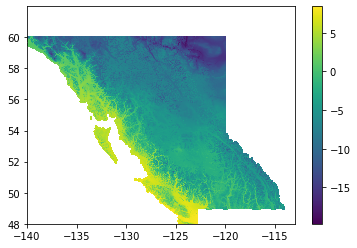

In [103]:
plt.pcolormesh(lon, lat, tmax[0, ...])
plt.colorbar()

In [105]:
lat.max()

61.99166666666074

# Test after re-gridding

In [10]:
from scipy.interpolate import griddata

In [15]:
with h5py.File(PRISM_dir + 'PRISM_regrid_BC_clim.hdf', 'r') as hdf_io:
    # clim. fileds
    wshed_mask = hdf_io['wshed_mask'][...]

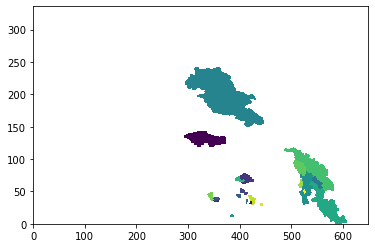

In [17]:
wshed_mask[wshed_mask==999]=np.nan
plt.pcolormesh(wshed_mask)

In [2]:
CLIM = {}
CLIM_REGRID = {}

with h5py.File(PRISM_dir + 'PRISM_regrid_BC_clim.hdf', 'r') as hdf_io:
    # clim. fileds
    CLIM['PCT'] = hdf_io['PCT_4km'][...]
    CLIM['TMAX'] = hdf_io['TMAX_4km'][...]
    CLIM['TMIN'] = hdf_io['TMIN_4km'][...]
    CLIM['TMEAN'] = hdf_io['TMEAN_4km'][...]
    # regridded clim. files
    CLIM_REGRID['PCT'] = hdf_io['PCT_REGRID'][...]
    CLIM_REGRID['TMAX'] = hdf_io['TMAX_REGRID'][...]
    CLIM_REGRID['TMIN'] = hdf_io['TMIN_REGRID'][...]
    CLIM_REGRID['TMEAN'] = hdf_io['TMEAN_REGRID'][...]
    # BC domain geo info
    lon_4km = hdf_io['lon_4km'][...]
    lat_4km = hdf_io['lat_4km'][...]
    lon_025 = hdf_io['lon_025'][...]
    lat_025 = hdf_io['lat_025'][...]
    land_mask = hdf_io['land_mask'][...]
    etopo_4km = hdf_io['etopo_4km'][...]
    etopo_025 = hdf_io['etopo_025'][...]
    etopo_regrid = hdf_io['etopo_regrid'][...]

In [3]:
lon_4km.shape

(336, 649)

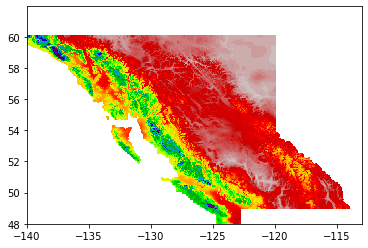

In [108]:
plt.pcolormesh(lon_4km, lat_4km, CLIM['PCT'][0, ...], cmap=plt.cm.nipy_spectral_r)

In [39]:
y_ncep = np.arange(24, 61.25, 0.25)
x_ncep = np.arange(215, 260.25, 0.25)-360
lon_ncep, lat_ncep = np.meshgrid(x_ncep, y_ncep)